# Prueba técnica - Científico de datos 

## Objetivo:

Idear una solución para identificar transacciones que evidencian un comportamiento de Mala Práctica Transaccional, empleando un producto de datos.

## EDA - Exploración de datos para detectar fraccionamiento transaccional

In [ ]:
# Librerías necesarias para la exploración de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ajuste formato visualización de números
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [ ]:
# Cargar los datos
df = pd.read_parquet(r"C:\Users\jorge\Downloads\Prueba_Nequi\sample_data_0006_part_00.parquet")

In [12]:
# Previsualización de los datos
df.head(7)

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
0,075d178871d8d48502bf1f54887e52fe,aa8dacff663072244d0a8ab6bbe36b93,824b2af470cbe6a65b15650e03b740fc,2021-09-12 18:32:03,648e257c9d74909a1f61c54b93a9e1b3,ba42d192a145583ba8e7bf04875f837f,178.33365037,CREDITO
1,075d178871d8d48502bf1f54887e52fe,a53bb81bd0bba2ae2535bda7ea5a550c,2d8d34be7509a6b1262336d036fdb324,2021-09-12 18:31:58,c0b62f9046c83ea5543ea46a497a4d6e,5cfff960ea6d732c1ba3e63d24f3be52,35.66673007,CREDITO
2,075d178871d8d48502bf1f54887e52fe,79f893ea65c06fe2933f3847c88c272f,5eeb18254850b21af0a6bb2697913cd3,2021-09-12 18:31:56,872d10143fc0ac7d5de467806f6bef81,c97e63a92c82c7217b333635d75928ed,142.66692029,CREDITO
3,075d178871d8d48502bf1f54887e52fe,ce577223699dbdc119df2ab8a35457fe,5221a599856c0a0588ed9ffd150edd3b,2021-09-12 18:31:10,2e35cfe7860a480a93e1c83e99843579,fc09bdd00f283222d65eaff4d00a6594,8.32223701,CREDITO
4,075d178871d8d48502bf1f54887e52fe,0ce7ab2950e7a788a608f881aec0f8f0,971e55ef12d80ec070ea4f6750c8b892,2021-09-12 18:31:07,995bc89e4c4e00334f1f90c4a55f4729,213527e8ba94fcaf2f9378969f9f6abc,32.10005706,CREDITO
5,075d178871d8d48502bf1f54887e52fe,01220d4c4ed48cfd6f7ca5f278f9a6f6,76aca4525838053ca0d5ba8e37f1ffe8,2021-09-12 18:31:06,a32395153b2dc1383304bd2c33990a78,d1022ab075c2a2cf681398670d2bf8a1,59.44455012,CREDITO
6,075d178871d8d48502bf1f54887e52fe,f02cabf07366d25120c9b2e7019a4205,6b102b2df10e986bd97b1b5713be0843,2021-09-12 18:30:55,2dd7afef1abfbfbbb68b6a31df70fc91,d6b9f3858016e0581e006ad574e23c6c,11.88891002,CREDITO


In [17]:
# Información general de los datos
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes)

Shape: (10758418, 8)
Columnas: ['merchant_id', '_id', 'subsidiary', 'transaction_date', 'account_number', 'user_id', 'transaction_amount', 'transaction_type']

Tipos de datos:
merchant_id                   object
_id                           object
subsidiary                    object
transaction_date      datetime64[ns]
account_number                object
user_id                       object
transaction_amount           float64
transaction_type              object
dtype: object


In [16]:
# Convertimos el tipo de dato de la variable monto transaccional
df['transaction_amount'] = pd.to_numeric(df['transaction_amount'])

In [18]:
# Verificación nulidad en los datos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
merchant_id           0
_id                   0
subsidiary            0
transaction_date      0
account_number        0
user_id               0
transaction_amount    0
transaction_type      0
dtype: int64


In [21]:
# Estadísticas descriptivas
print("\nResumen estadístico del monto:")
print(df['transaction_amount'].describe())


Resumen estadístico del monto:
count   10758418.00
mean         191.40
std          240.86
min            5.94
25%           35.67
50%          107.00
75%          237.78
max         4624.79
Name: transaction_amount, dtype: float64


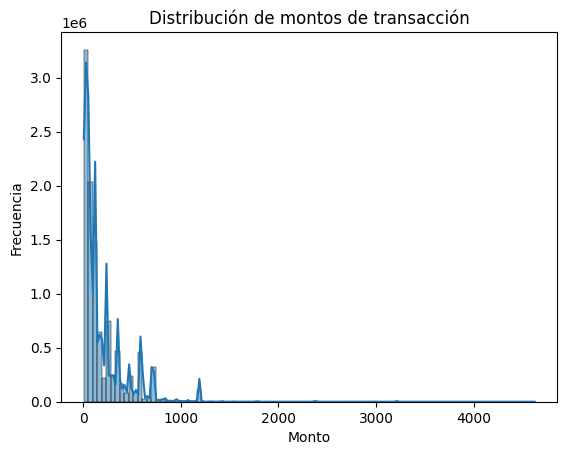

In [22]:
# Distribución del monto
sns.histplot(df['transaction_amount'], bins=100, kde=True)
plt.title("Distribución de montos de transacción")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.show()

In [24]:
# Analizar transacciones por usuario por día
df['fecha'] = df['transaction_date'].dt.date
txns_por_usuario_dia = df.groupby(['user_id', 'fecha']).agg({
    'transaction_amount': ['count', 'sum', 'mean', 'std']
}).reset_index()
txns_por_usuario_dia.columns = ['user_id', 'fecha', 'num_txns', 'suma_montos', 'promedio', 'desviacion']

print("\nEjemplo de transacciones por usuario por día:")
print(txns_por_usuario_dia.sort_values(by='num_txns', ascending=False).head())



Ejemplo de transacciones por usuario por día:
                                  user_id       fecha  num_txns  suma_montos  \
4083567  71aa1651d9adc0b226107084fba3d71c  2021-02-07       288      6018.29   
8161081  e2d6158cc2b6467a47223cb2629f03f3  2021-02-02       201      1347.25   
97728    02bb2479b4fe6c8119254eaacc88ba7e  2021-01-22       200      1223.23   
9088288  fc794dabb3afc434e73ce67e6b9542e4  2021-02-08       200      1188.99   
8985883  f9a10e0f56a96d244feadda0194fcb06  2021-02-02       200      1188.89   

         promedio  desviacion  
4083567     20.90       44.25  
8161081      6.70        7.66  
97728        6.12        1.36  
9088288      5.94        0.01  
8985883      5.94        0.00  


In [25]:
# Umbral heurístico alto de fraccionamiento: muchas transacciones pequeñas en 1 día
umbral_txns = 5
umbral_monto_total = df['transaction_amount'].quantile(0.95)

sospechosos = txns_por_usuario_dia[
    (txns_por_usuario_dia['num_txns'] >= umbral_txns) &
    (txns_por_usuario_dia['suma_montos'] >= umbral_monto_total)
]

print(f"\nPosibles casos sospechosos de fraccionamiento transaccional: {sospechosos.shape[0]}")
print(sospechosos.head())


Posibles casos sospechosos de fraccionamiento transaccional: 11497
                               user_id       fecha  num_txns  suma_montos  \
2178  000f39e1bb61ad6ea17fcc3e71dd9e01  2021-04-16         5      1890.34   
2698  001366c2710ad30d510bf1170bb61448  2021-01-12         8      5147.90   
4300  001ef5cba1bfcd9853731c2b9c76e108  2021-11-24         6      1034.34   
4303  001ef5cba1bfcd9853731c2b9c76e108  2021-11-30         7      1783.34   
5721  00294069da380bf53d0220bb6de69cff  2021-02-02         5      3566.67   

      promedio  desviacion  
2178    378.07      309.61  
2698    643.49      197.56  
4300    172.39       67.99  
4303    254.76      107.41  
5721    713.33        0.00  


## Construcción modelo analítico

Para abordar el objetivo de este problema analítico, existen varios enfoques posibles: métodos heurísticos basados en reglas, detección no supervisada mediante clustering, o modelos de puntuación de riesgo transaccional. En este caso particular, se desarrollará el modelo de datos con un enfoque heurístico.

### 1. Prouesta flujo de datos (pipeline heurístico)

**Entrada:** Archivo de transacciones (`.parquet`) con columnas como `user_id`, `transaction_date`, `transaction_amount`, `transaction_type`.

**Transformación:**

1.  Convertir fechas y extraer solo día.
2.  Agrupar transacciones por `user_id` y `fecha`.
3.  Calcular:
    * Número de transacciones
    * Suma de montos
    * Promedio
    * Desviación estándar
4.  Aplicar regla heurística:
    * Si un usuario tiene $\ge N$ transacciones en un día y la suma de los montos supera un umbral, se marca como sospechoso.

**Salida:** Tabla con `user_id`, `fecha`, número de transacciones, monto total y flag de fraccionamiento sospechoso.

### 2. Modelo heurístico

In [ ]:
# Paso 1: Agrupar por usuario y fecha
df['fecha'] = df['transaction_date'].dt.date
agrupado = df.groupby(['user_id', 'fecha']).agg(
    num_txns=('transaction_amount', 'count'),
    suma_montos=('transaction_amount', 'sum'),
    promedio=('transaction_amount', 'mean'),
    desviacion=('transaction_amount', 'std')
).reset_index()

In [27]:
# Paso 2: Definir umbrales
umbral_txns = 5  # mínimo de transacciones en un mismo día
umbral_monto = df['transaction_amount'].quantile(0.95)  # suma de montos sospechosa

In [28]:
# Paso 3: Aplicar reglas heurísticas
agrupado['sospechoso'] = (
    (agrupado['num_txns'] >= umbral_txns) &
    (agrupado['suma_montos'] >= umbral_monto)
)

In [29]:
# Paso 4: Filtrar los casos sospechosos
casos_sospechosos = agrupado[agrupado['sospechoso'] == True]

print(f"Casos sospechosos detectados: {casos_sospechosos.shape[0]}")
print(casos_sospechosos.head())

Casos sospechosos detectados: 11497
                               user_id       fecha  num_txns  suma_montos  \
2178  000f39e1bb61ad6ea17fcc3e71dd9e01  2021-04-16         5      1890.34   
2698  001366c2710ad30d510bf1170bb61448  2021-01-12         8      5147.90   
4300  001ef5cba1bfcd9853731c2b9c76e108  2021-11-24         6      1034.34   
4303  001ef5cba1bfcd9853731c2b9c76e108  2021-11-30         7      1783.34   
5721  00294069da380bf53d0220bb6de69cff  2021-02-02         5      3566.67   

      promedio  desviacion  sospechoso  
2178    378.07      309.61        True  
2698    643.49      197.56        True  
4300    172.39       67.99        True  
4303    254.76      107.41        True  
5721    713.33        0.00        True  


### 3. Recomendación frecuencia de actualización

La frecuencia de actualizaión se seguiere que sea diaria, ya que el faccionamiento transaccional ocurre tipicamente dentro de ventanas de 24 horas, al igual que este monitoreo diario permite detectar patrones antes de que escalen, permitiendo enviar alertas tempranas a áreas de control interno. Con herramientas como Airflow, se puede ejecutar un pipeline diario que lea del `.parquet`, aplique las reglas y guarde los casos sospechosos en un dashboard o tabla de monitoreo.

### 4. Recomendaciones para extensión del modeloo

Consideraciones a tener en cuenta para comprender de manera más detallada y acertiva las cuentas identificadas como sospechosas:

* Calcular "riesgo de fraccionamiento" como una **puntuación escalada entre 0 y 1**.

* Incorporar features adicionales:
    * ¿Ocurre en la misma `subsidiary`?
    * ¿A un mismo `merchant_id`?
    * ¿Repite el comportamiento en varios días?

* Aplicar métodos no supervisados como `Isolation Forest` o `DBSCAN` sobre features construidas.